In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Load dataset
csv_file_path = "../random_caption/posts_random_caption.csv"  # Update with your actual file path
df = pd.read_csv(csv_file_path)
df.head()

,PostID,Caption,Body,Tags,Location
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN


In [4]:
# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")
df.head()

,PostID,Caption,Body,Tags,Location,text
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN,Food for air travel For most of our flights st...
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN,Would you rather spend 2 days in Edinburgh and...
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN,If you’ve done a Caribbean or Bahamas cruise w...
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN,"One week in Spain, the other week in….where? W..."
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN,"Munich/Spain Itinerary Hey guys, hoping someon..."


In [5]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
text_vectors = vectorizer.fit_transform(df["text"])

In [6]:
# Apply K-Means Clustering
num_clusters = 15  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(text_vectors)

# Compute Pairwise Distance Matrix within Clusters
distance_matrix = pairwise_distances(kmeans.cluster_centers_, metric="euclidean")

In [7]:
# Save clustered data
df.to_csv("../random_caption/posts_random_caption_clustered.csv", index=False)

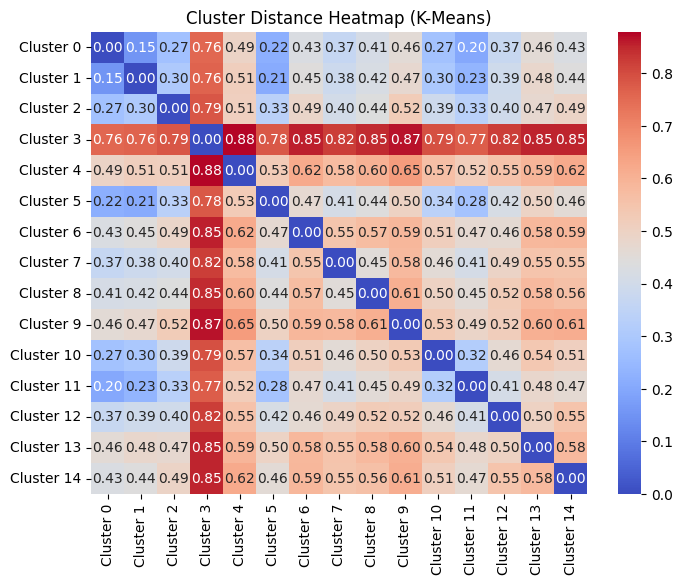

In [8]:
# Convert to DataFrame for Visualization
distance_df = pd.DataFrame(distance_matrix, index=[f"Cluster {i}" for i in range(num_clusters)],
                           columns=[f"Cluster {i}" for i in range(num_clusters)])

# Plot Heatmap of Cluster Distances
plt.figure(figsize=(8, 6))
sns.heatmap(distance_df, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Distance Heatmap (K-Means)")
plt.show()